In [1]:
# tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd

data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
bankdata['class'].unique()

array([0, 1])

In [3]:
bankdata['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [4]:
bankdata['class'].value_counts(normalize=True)

class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

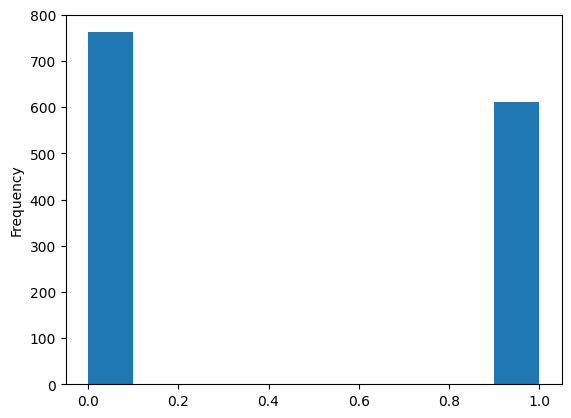

In [5]:
bankdata['class'].plot.hist();

In [6]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
# predictors vs class
y = bankdata['class']
X = bankdata.drop('class', axis=1) # axis=1 means dropping from the column axis

In [8]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [9]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',verbose=1,degree=3,gamma=2)

In [11]:
svc.fit(X_train, y_train)

[LibSVM]...............................................................................*.....................................................................................................................*..........................................................*
optimization finished, #iter = 254276
obj = -0.102876, rho = 1.086351
nSV = 17, nBSV = 0
Total nSV = 17


SVC(gamma=2, kernel='poly', verbose=1)

In [12]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



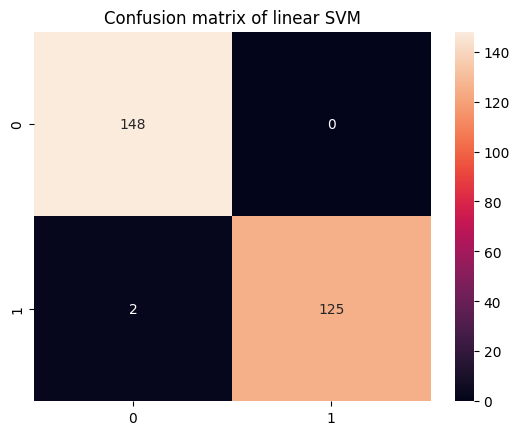

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



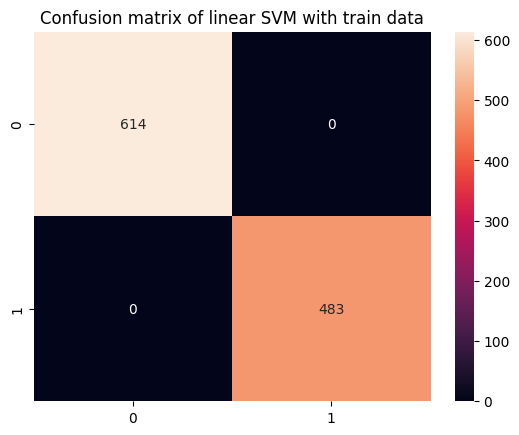

In [14]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [15]:
svc.get_params()
print(svc.n_support_)

[ 4 13]


In [16]:
# get the actual output of SVM
decision_function = svc.decision_function(X_test)

In [17]:
print(decision_function)

[-1.54781723e+02 -4.19762402e+01 -5.93741301e+01 -1.09005014e+03
 -1.50388435e+02 -1.75316532e+01 -2.09763532e+02 -2.24014827e+01
 -5.90354394e+00 -1.85061295e+02  1.09541753e+00  1.29596473e+00
 -9.30630639e+01  1.61984828e+00 -1.52696966e+02  1.59742355e+00
  1.00991987e+00  1.03405124e+00  2.05021507e+01  1.14416773e+00
 -2.06642371e+02 -6.69770163e+01  1.06682185e+00 -1.59320967e+02
  2.82351539e+01 -6.57858899e+01 -2.06322885e+02  2.14726196e+00
 -3.52255650e+02 -1.82868304e+02  1.80628145e+00 -7.47881233e+01
 -2.82830744e+01  9.23837811e+01  2.33045439e+01 -1.73167012e+02
  1.16752844e+00  2.91800492e+00  1.25723750e+00 -1.02031845e+02
 -1.18625685e+02  4.34399059e+00  1.06836091e+00 -2.00133886e+02
  2.92910816e+00  4.43565127e+00  2.69238677e+00 -1.98422654e+01
 -3.30062929e+01  1.94178776e+00 -1.52479937e+01 -2.28875237e+01
 -3.12764665e+02 -1.25214385e+02 -1.37265956e+02  1.00593537e+00
 -6.67311906e+02 -1.50773632e+02 -3.52038984e+01 -2.64936847e+02
  2.70729267e+00 -6.38837

In [18]:
import numpy as np
print("svc.gamma: ", svc.gamma)
print("svc.degree: ", svc.degree)

sv=open("../data-kernel-model/support_vectors_poly.txt","w")
dual_coeff=open("../data-kernel-model/dual_coeff_poly.txt","w")
intercept=open("../data-kernel-model/intercept_poly.txt","w")
xtestSample="../data-kernel-model/xtest_poly.txt"
ytestSample="../data-kernel-model/ytest_poly.txt"
ytestClassificationScore="../data-kernel-model/yclassificationscore.txt"

np.savetxt(sv,svc.support_vectors_)
    
np.savetxt(dual_coeff,svc.dual_coef_,delimiter=' ')
np.savetxt(intercept,svc.intercept_,delimiter=' ')

with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")
        
np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))
    
sv.close()
dual_coeff.close()
intercept.close()
f1.close()
f2.close()

svc.gamma:  2
svc.degree:  3
